In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

from sklearn.ensemble import RandomForestClassifier #GradientBoostingClassifier,
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
#from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.cross_validation import cross_val_score

import seaborn as sns

In [17]:
r_state = 42
best_k = 3
n_est = 75

pred_c = "orange"
pred_al = 0.6
data_c = "purple"
data_al = 0.6

party = 'republican'
sns.set(style="whitegrid", color_codes=True)

##Classification Error Metric Challenges  

*These reference the Classification Challenges.*  

###Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [3]:
col_names = ["Party"] + ["V%d" %x for x in range(1,17)]
print col_names
votes = pd.read_csv("house-votes-84.data", sep=",", na_values="?", names=col_names)
votes.head()

['Party', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']


,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
votes = votes.replace("n", 0)
votes = votes.replace("y", 1)
votes.head()

,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [5]:
votes = votes.fillna(votes.mean())
votes.head(10)

,Party,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1.000000,1,0.000000,1.000000
1,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1.000000,1,0.000000,0.812689
2,democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1.000000,1,0.000000,0.000000
3,democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1.000000,0,0.000000,1.000000
4,democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1.000000,1,1.000000,1.000000
5,democrat,0.00000,1,1,0.000000,1.000000,1,0,0,0,0,0.000000,0.000000,1.000000,1,1.000000,1.000000
6,democrat,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,0.000000,0.509756,1,1.000000,1.000000
7,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,0.000000,1.000000,1,0.427518,1.000000
8,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1.000000,1,0.000000,1.000000
9,democrat,1.00000,1,1,0.000000,0.000000,0,1,1,1,0,0.000000,0.000000,0.000000,0,0.427518,0.812689


In [6]:
y = votes["Party"]
X = votes.iloc[:,1:]
#X.insert(0, "Intercept", 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=r_state)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
177,0.00000,0.000000,1,0,0.000000,0,1.000000,1,1.000000,1,1.000000,0.423267,0.000000,0,1,1.000000
206,0.00000,0.000000,0,1,1.000000,1,0.000000,0,0.000000,1,0.000000,1.000000,0.000000,1,0,1.000000
13,1.00000,1.000000,1,0,0.000000,1,1.000000,1,0.501211,1,1.000000,0.423267,0.000000,0,1,0.812689
390,0.44208,0.503876,0,0,0.504762,1,0.567696,0,0.000000,0,1.000000,1.000000,0.000000,1,0,0.812689
413,1.00000,1.000000,1,1,1.000000,1,1.000000,1,0.000000,1,0.362319,0.423267,0.509756,1,0,1.000000


In [7]:
models = {'logistic': LogisticRegression(),
          'rf': RandomForestClassifier(n_estimators=n_est),
          'knn': KNeighborsClassifier(n_neighbors=best_k),
          'svc': SVC(probability=True),
          'tree': DecisionTreeClassifier(),
         }

pred_probs = {}
scores = {}

In [8]:
for mname, m in models.iteritems():
    print "*** %s" % mname
    m.fit(X_train, y_train)
    pred_probs[mname] = {'train': m.predict_proba(X_train),  'test': m.predict_proba(X_test)}
    pred = m.predict(X_test)
    prec, recall, fscore, sup = precision_recall_fscore_support(y_test, pred, average='binary', pos_label=party)
    scores[mname] = {'accuracy': accuracy_score(y_test, pred),
                     'precision': prec,
                     'recall': recall,
                     'fscore': fscore}

*** knn
*** rf
*** tree
*** svc
*** logistic


In [9]:
scores

{'knn': {'accuracy': 0.95412844036697253,
  'fscore': 0.93506493506493504,
  'precision': 0.92307692307692313,
  'recall': 0.94736842105263153},
 'logistic': {'accuracy': 0.95412844036697253,
  'fscore': 0.93506493506493504,
  'precision': 0.92307692307692313,
  'recall': 0.94736842105263153},
 'rf': {'accuracy': 0.95412844036697253,
  'fscore': 0.93506493506493504,
  'precision': 0.92307692307692313,
  'recall': 0.94736842105263153},
 'svc': {'accuracy': 0.95412844036697253,
  'fscore': 0.93506493506493504,
  'precision': 0.92307692307692313,
  'recall': 0.94736842105263153},
 'tree': {'accuracy': 0.93577981651376152,
  'fscore': 0.90909090909090906,
  'precision': 0.89743589743589747,
  'recall': 0.92105263157894735}}

###Challenge 2  

For each, draw the ROC curve and calculate the AUC.

In [10]:
def plot_roc_auc(mname, y_t, pred_prob_ts, pos_l):
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_t, pred_prob_ts[:, 1], pos_label=pos_l)
    roc_auc = auc(fpr, tpr)
    print "Area under the ROC curve : %f" % roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for %s' %mname)
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.973499


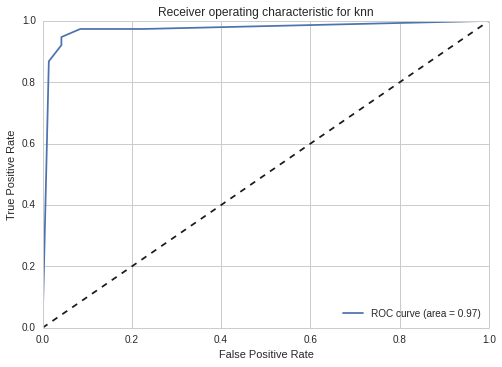

Area under the ROC curve : 0.988325


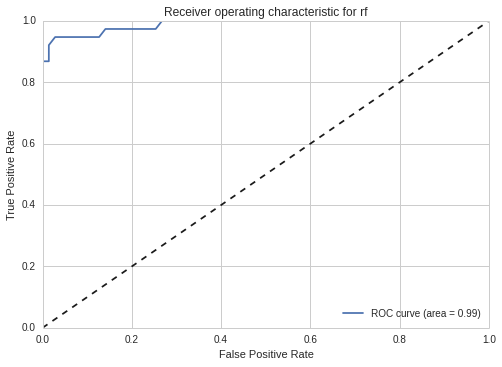

Area under the ROC curve : 0.932357


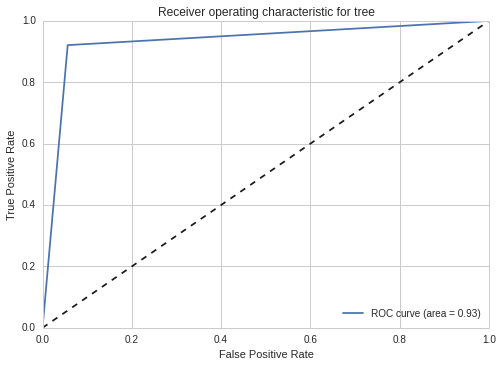

Area under the ROC curve : 0.992587


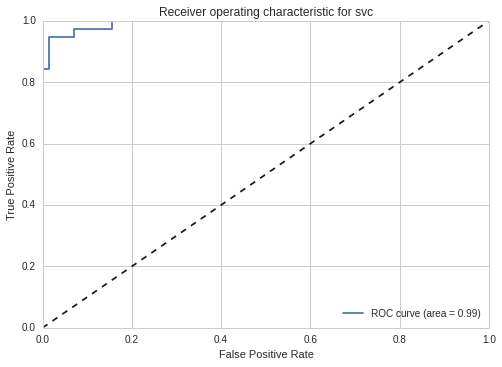

Area under the ROC curve : 0.994811


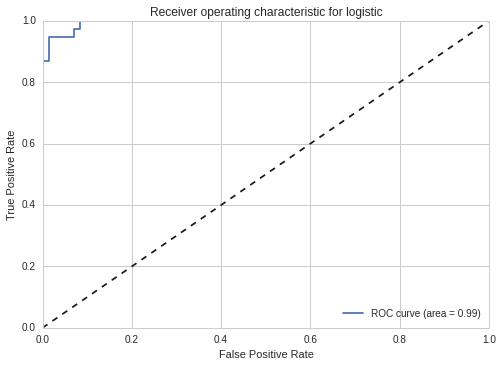

In [11]:
for mname, p in pred_probs.iteritems():
    prob = p["test"]
    plot_roc_auc(mname, y_test, prob, party)

###Challenge 3  

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [12]:
models3 = {'logistic': LogisticRegression(),
          'rf': RandomForestClassifier(n_estimators=n_est),
          'knn': KNeighborsClassifier(n_neighbors=best_k),
          'svc': SVC(probability=True),
          'tree': DecisionTreeClassifier(),
         }

In [20]:
for mname, m in models3.iteritems():
    print mname, "cross vall score:", np.mean(cross_val_score(m, X, y))
    

knn cross vall score: 0.933333333333
rf cross vall score: 0.965517241379
tree cross vall score: 0.95632183908
svc cross vall score: 0.954022988506
logistic cross vall score: 0.96091954023


### Challenge 4  

For your movie classifiers, calculate the precision and recall for each class.

In [31]:
movies = pd.read_csv("2013_movies.csv", sep=",")
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [32]:
moviesb = movies.dropna()
Xm = moviesb[["Budget", "DomesticTotalGross", "Runtime"]]
ym = moviesb["Rating"]
Xm.head()

,Budget,DomesticTotalGross,Runtime
0,130000000,424668047,146
1,200000000,409013994,129
2,150000000,400738009,108
3,76000000,368061265,98
4,225000000,291045518,143


In [33]:
models4 = {'logistic': LogisticRegression(),
          'rf': RandomForestClassifier(n_estimators=n_est),
          'knn': KNeighborsClassifier(n_neighbors=best_k),
          'svc': SVC(probability=True),
          'tree': DecisionTreeClassifier(),
         }

pred_probs4 = {}
scores4 = {}

In [34]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.25, random_state=r_state)
Xm_train.head()

,Budget,DomesticTotalGross,Runtime
43,135000000,83028128,96
31,55000000,107100855,134
11,170000000,206362140,120
72,58000000,44672764,119
5,100000000,274092705,91


In [36]:
for mname, m in models4.iteritems():
    print "*** %s" % mname
    m.fit(Xm_train, ym_train)
    pred_probs4[mname] = {'train': m.predict_proba(Xm_train),  'test': m.predict_proba(Xm_test)}
    pred = m.predict(Xm_test)
    prec, recall, fscore, sup = precision_recall_fscore_support(ym_test, pred)
    scores4[mname] = {'accuracy': accuracy_score(ym_test, pred),
                     'precision': prec,
                     'recall': recall,
                     'fscore': fscore}
scores

*** knn
*** rf
*** tree
*** svc
*** logistic


{'knn': {'accuracy': 0.94495412844036697,
  'fscore': 0.92307692307692313,
  'precision': 0.90000000000000002,
  'recall': 0.94736842105263153},
 'logistic': {'accuracy': 0.95412844036697253,
  'fscore': 0.93506493506493504,
  'precision': 0.92307692307692313,
  'recall': 0.94736842105263153},
 'rf': {'accuracy': 0.95412844036697253,
  'fscore': 0.93506493506493504,
  'precision': 0.92307692307692313,
  'recall': 0.94736842105263153},
 'svc': {'accuracy': 0.95412844036697253,
  'fscore': 0.93506493506493504,
  'precision': 0.92307692307692313,
  'recall': 0.94736842105263153},
 'tree': {'accuracy': 0.93577981651376152,
  'fscore': 0.90909090909090906,
  'precision': 0.89743589743589747,
  'recall': 0.92105263157894735}}

### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [14]:
haber_cols = ["Age", "19YR", "Nodes", "SStatus"]
haber = pd.read_csv("haberman.data", sep=",", names=haber_cols)
haber.head()

,Age,19YR,Nodes,SStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
Xh = haber[["Age", "19YR", "Nodes"]]
yh = haber["SStatus"]
print Xh.head(), "\n", yh.head()

   Age  19YR  Nodes
0   30    64      1
1   30    62      3
2   30    65      0
3   31    59      2
4   31    65      4 
0    1
1    1
2    1
3    1
4    1
Name: SStatus, dtype: int64


Area under the ROC curve : 0.661565


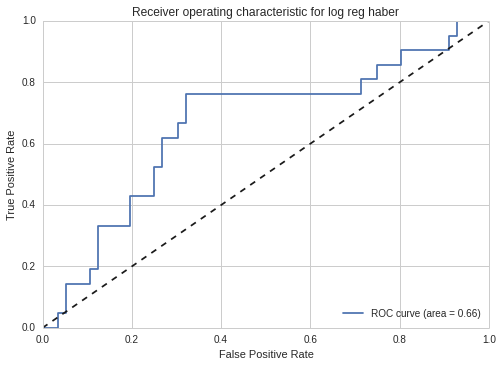

In [16]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.25, random_state=r_state)
lh = LogisticRegression()
lh.fit(Xh_train, yh_train)
pred_probsh = lh.predict_proba(Xh_test)
plot_roc_auc("log reg haber", yh_test, pred_probsh, 2)